# **Import and define**

In [1]:
import sys
sys.path.append('./helper')
sys.path.append('./model')

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from models import YoloV1
import dataset
from utils import prepare_image, draw_output
import tensorflow as tf


input_shape = (448, 448, 3)
label_names = ['apple', 'banana', 'orange']
weights_path = './weight/yolo_best_weights.hdf5'

# **Load the model and the example image**

In [3]:
yolo = YoloV1(input_shape=input_shape, num_classes=len(label_names))
#yolo.load_weights(weights_path)

2022-07-21 15:38:04.228074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
img_dir = './fruits_dataset/train'
img_df = dataset.get_dataframe(img_dir)
random_img_files = img_df.Image_file.sample(10)

In [5]:
imgs = [prepare_image(img_file, input_shape) for img_file in random_img_files]
imgs = np.asarray(imgs)

# **Run inference and display result**

In [6]:
boxes, scores, classes, nums = yolo(imgs)

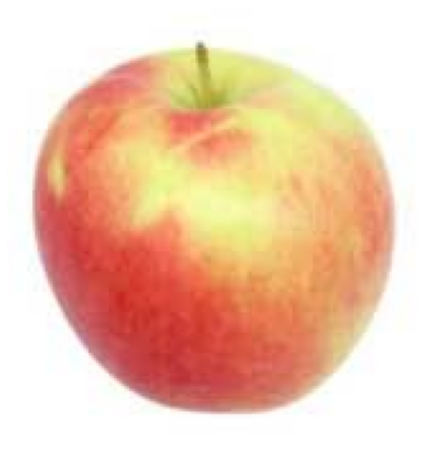

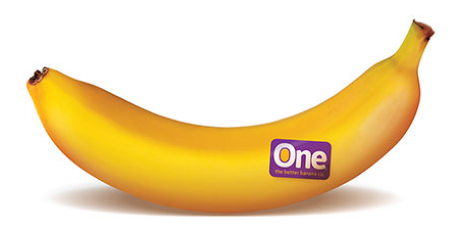

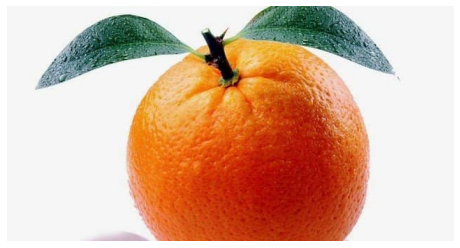

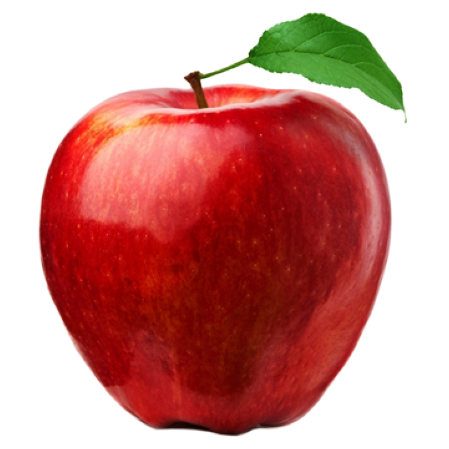

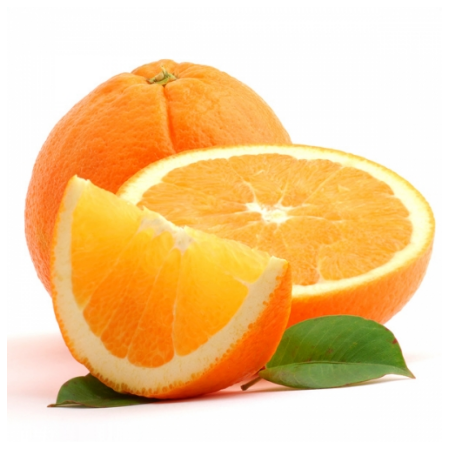

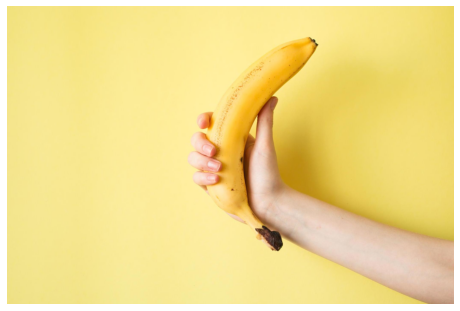

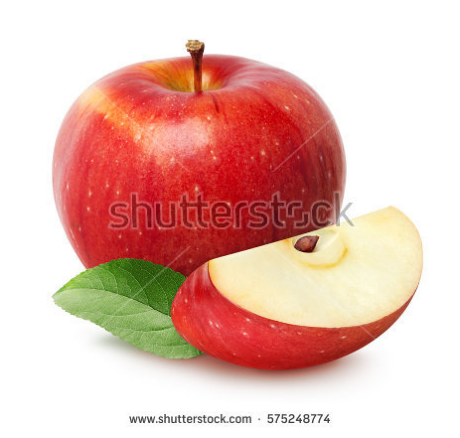

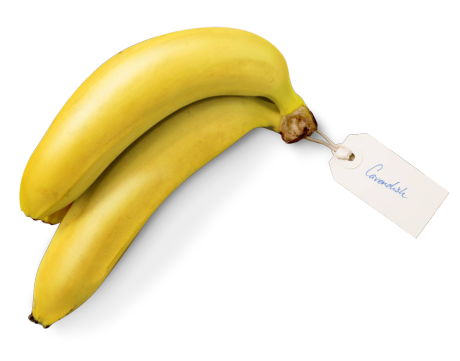

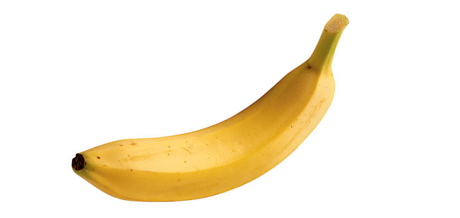

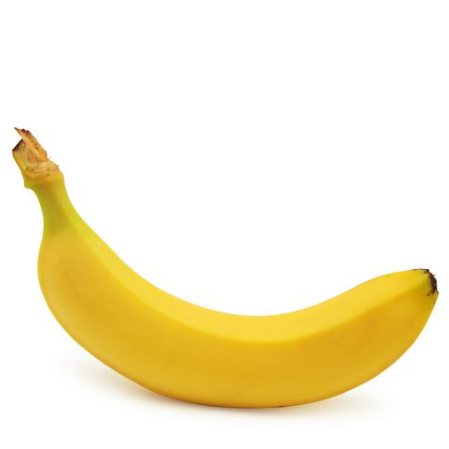

In [7]:
for (i, img_file) in enumerate(random_img_files):
    img = Image.open(img_file)
    img = draw_output(np.asarray(img), (boxes[i], scores[i], classes[i], nums[i]), label_names)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')